In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data
path = './training/'
olympics = pd.read_csv(path+'olympics.csv',skiprows=4)

print('DataFrame Details\n\nTotal Rows: {0}\nTotal Columns: {1}'.format(olympics.shape[0],olympics.shape[1]))
display(olympics.head())

DataFrame Details

Total Rows: 29216
Total Columns: 10


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


#### Olympics Performance

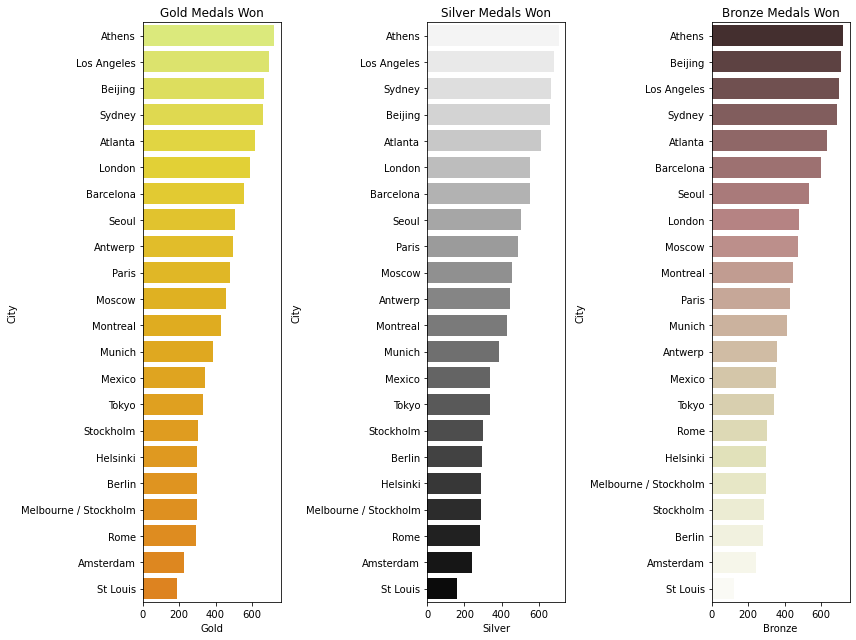

In [3]:
cities = list(olympics.City.unique())
gold_medals = []
silver_medals = []
bronze_medals = []

for i in range(len(cities)):
    x = olympics[olympics.City == cities[i]]
    g = sum(np.where(x.Medal == 'Gold',1,0))
    s = sum(np.where(x.Medal == 'Silver',1,0))
    b = sum(np.where(x.Medal == 'Bronze',1,0))
    gold_medals.append(g)
    silver_medals.append(s)
    bronze_medals.append(b)
#
data = pd.DataFrame({'City':cities,'Gold':gold_medals,'Silver':silver_medals,'Bronze':bronze_medals})
data['Total'] = data.sum(axis=1)
data = data.sort_values(by='Total',ascending=False).reset_index(drop=True)

medals = list(olympics.Medal.unique())
color = ['Wistia','binary','pink']
plt.figure(figsize=(12,9))
for i in range(len(medals)):
    data = data.sort_values(medals[i],ascending=False)
    plt.subplot(1,3,i+1)
    sns.barplot(x=medals[i],y='City',data=data,palette=color[i])
    plt.title(f'{medals[i]} Medals Won')
#
plt.tight_layout()

#### Most Popular Disciplines

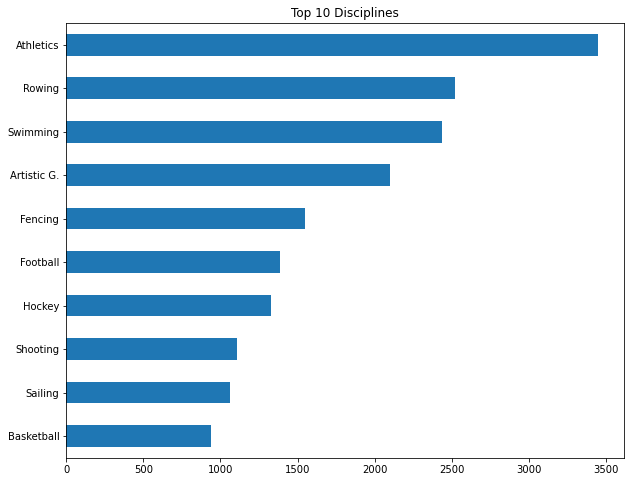

In [4]:
disciplines = olympics.Discipline.value_counts()[:10]
disciplines.sort_values().plot(kind='barh',title='Top 10 Disciplines',figsize=(10,8))
plt.show()

#### Medals Won by Country

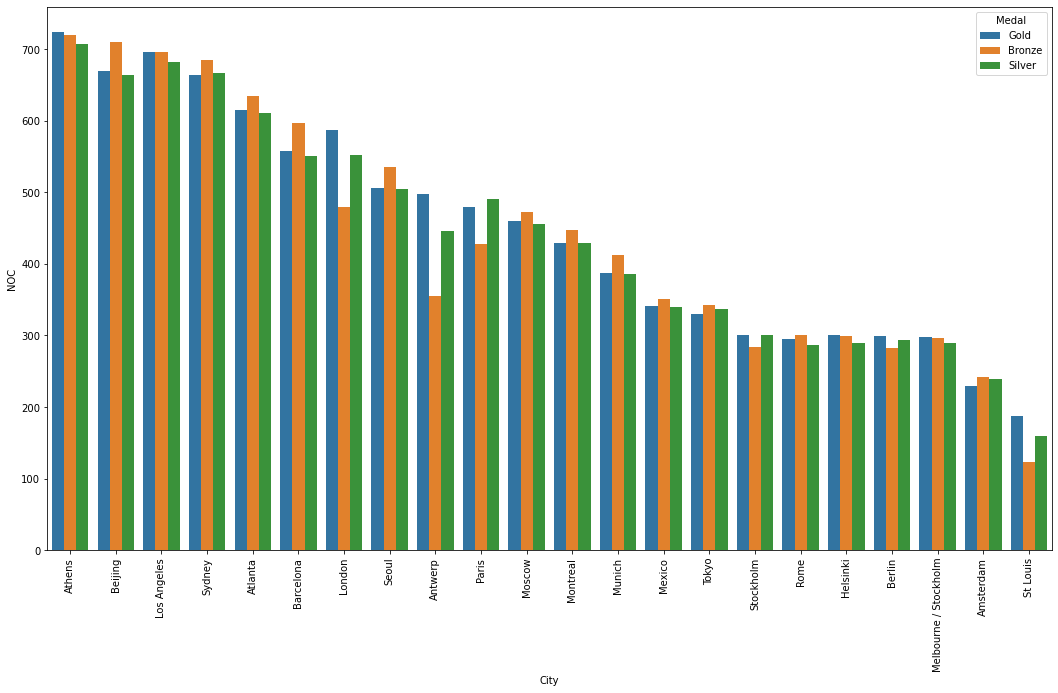

In [5]:
grouped = olympics.groupby(['City','Medal'])['NOC'].count().reset_index()
grouped = grouped.sort_values('NOC',ascending=False)
plt.figure(figsize=(18,10))
sns.barplot(x='City',y='NOC',hue='Medal',data=grouped)
plt.xticks(rotation=90)
plt.show()